In [42]:
#for paper2 discussion part: classify different groups with their antisymmetric power spectrum
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d, interp2d
from importlib import reload
from scipy.optimize import curve_fit

import antisym_func
reload(antisym_func)

<module 'antisym_func' from '/Users/liuzhaoning/Desktop/Today/antisym_observability/pycode/antisym_func.py'>

In [43]:
#function used to set up parameters
def setting_parameters(zeta, T_vir, R_mfp, z_xH_data, xH_data, zeta_data, T_vir_data, PLOT):
    tick1 = time.time()
    M_max = antisym_func.RtoM(R_mfp)
    NUM = 100; z_zeta_interp_array = np.linspace(5.5, 13.5, NUM); zeta_z_interp_array = []
    for i in range(NUM):
        zeta_z_interp_array.append(antisym_func.zeta_z(z_zeta_interp_array[i], zeta, T_vir, mu))
    zeta_z_func = interp1d(z_zeta_interp_array, zeta_z_interp_array, kind = 'cubic')
    z_history = np.linspace(6, 12, 100); HI_history = [];
    for z in z_history:
        HI_history.append(1 - antisym_func.bar_Q(z, M_max, zeta_z_func, T_vir, mu, antisym_func.PARA_z(z, M_max, zeta_z_func, T_vir, mu)))
    [z_dxHdz_history, dxHdz_history] = antisym_func.dxH_dz_cal(z_history, HI_history)
    max_speed = max(dxHdz_history)
    turning_redshift = z_dxHdz_history[dxHdz_history.index(max_speed)]
    #plot the history
    if (PLOT == 1):
        fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6,6))
        fig.subplots_adjust(hspace=0)
        colorlist=['#845EC2', '#FF6F91', '#FF9671', '#FFC75F']
        if (len(z_xH_data) >= 1):
            for i in range(len(z_xH_data)):
                [z_dxHdz_data, dxHdz_data] = antisym_func.dxH_dz_cal(z_xH_data, xH_data)
                axs[0].plot(z_xH_data[i], xH_data[i], color = colorlist[i], lw=1, ls='-', label=r'$\zeta=%3.3g, T_\mathrm{vir}=%5.5g$'%(zeta_data[i], T_vir_data[i]))
                axs[1].plot(z_dxHdz_data, dxHdz_data, color = colorlist[i], lw=1, ls='-', label=r'$\zeta=%3.3g, T_\mathrm{vir}=%5.5g$'%(zeta_data[i], T_vir_data[i]))
        axs[0].tick_params(direction='in',length=3)
        axs[0].plot(z_history, HI_history, color = 'black', lw=1, ls='-', label=r'$\zeta=%3.3g, T_\mathrm{vir}=%5.5g$'%(zeta, T_vir))
        axs[0].set_ylabel(r'$\bar{x}_{\mathrm{HI}}$',fontsize=14)
        axs[0].set_ylim(0,1)
        axs[0].legend(loc=2,fontsize=12)
        axs[1].plot(z_dxHdz_history, dxHdz_history, color = 'black', lw=1, ls='-')
        axs[1].set_ylim(0.0,0.44); axs[1].set_xlim(6,11)
        axs[1].set_ylabel(r'd$\bar{x}_{\mathrm{HI}}$/dz',fontsize=14)
        axs[1].set_xlabel('z',fontsize=14)
        axs[1].tick_params(direction='in',length=3)
        #axs[1].text(8.3, 0.31,'accel.',fontsize=14); axs[1].text(6.7, 0.3, 'decel.', fontsize = 14)
        axs[1].text(9, 0.39,'maximum speed: %3.3g'%max_speed,fontsize=12)
        axs[1].text(9, 0.36,'turning redshift: %3.3g'%turning_redshift,fontsize=12)
    tick2 = time.time()
    print('history comuputation at zeta=%3.3g T_vir=%3.3g cost %3.3g seconds'%(zeta, T_vir, tick2 - tick1))
    return [z_history, HI_history]

In [44]:
#set the parameters
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
R_mfp = 50 #Mpc
M_max = antisym_func.RtoM(R_mfp)
mu = 0.6 #since all of T_vir > 1e4
SMOOTHING_Pk = [250, 384]
SMOOTHING_SCALE = 384

zeta_array = []; T_vir_array = [];#[z_turning][maximum_speed]
zeta_array.append([17.15, 22.3, 28.4, 37.3]); T_vir_array.append([2.71e4, 4.3e4, 6.6e4, 9.5e4])
zeta_array.append([20.3, 26.4, 34.6, 45.7]); T_vir_array.append([2.28e4, 3.66e4, 5.6e4, 8.2e4])
zeta_array.append([24, 31.6, 42.5, 56.5]); T_vir_array.append([1.9e4, 3.08e4, 4.7e4, 6.9e4])
max_dxHdz = [0.33, 0.36, 0.39, 0.42]

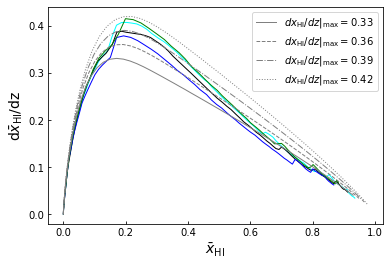

In [45]:
#read in the history of our groups
DIR_read = '/Users/liuzhaoning/Desktop/Today/antisym_observability/data/antisym_observability/xi_A_HICO/'

z_history_array = []; xH_history_array = []#[z_turning][maximum_speed]
z_dxHdz_history = []; dxHdz_history = []
for i in range(len(zeta_array)):
    z_history_array.append([]); xH_history_array.append([])
    z_dxHdz_history.append([]); dxHdz_history.append([])
    for j in range(len(zeta_array[i])):
        zeta = zeta_array[i][j]; T_vir = T_vir_array[i][j]
        data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/history.npz'%(zeta, T_vir, R_mfp, SMOOTHING_SCALE))
        z_history_array[-1].append(list(data['z_array_history'])); xH_history_array[-1].append(list(data['HI_history']))
        z_dxHdz_history[-1].append(list(data['z_dxHdz_history'])); dxHdz_history[-1].append(list(data['dxHdz_history']))

#read in the histories of Zhou et al. 2020
z_HI = np.loadtxt('../data/zhou/history/history_z.txt')
linestylelist = ['-','--','-.', ':']
HI_zhou = []; dxHdz_zhou = []; filename = ['cyan', 'black', 'blue', 'green']
for i in range(4):
    HI_zhou.append(np.loadtxt('../data/zhou/history/history_HI_%s.txt'%filename[i]))
    dxHdz_zhou.append(antisym_func.dxH_dz_cal(z_HI, HI_zhou[-1])[1])
z_dxHdz = antisym_func.dxH_dz_cal(z_HI, HI_zhou[0])[0]

#plot the history
fig, axs = plt.subplots(1, 1, sharex=True, figsize=(6,4))
fig.subplots_adjust(hspace=0)
for i in range(4):
    axs.plot(HI_zhou[i][:-1], dxHdz_zhou[i], color = filename[i], lw=1)
i = 0
max_dxHdz = [0.33, 0.36, 0.39, 0.42]
for j in range(len(zeta_array[i])):
    axs.plot(xH_history_array[i][j][:-1], dxHdz_history[i][j], linestyle = linestylelist[j], color = 'grey', lw=1, label='$dx_\mathrm{HI}/dz |_\mathrm{max}=%3.3g$'%max_dxHdz[j])
axs.legend(loc = 1)
#axs.set_ylim(0.0,0.46); axs.set_xlim(6,11)
axs.set_ylabel(r'd$\bar{x}_{\mathrm{HI}}$/dz',fontsize=14)
axs.set_xlabel(r'$\bar{x}_\mathrm{HI}$',fontsize=14)
axs.tick_params(direction='in',length=3)
#axs[1].text(8.3, 0.31,'accel.',fontsize=12); axs[1].text(6.7, 0.3, 'decel.', fontsize = 12)
plt.savefig('../figures/history_simu_ana_xH-dxHdz.png', bbox_inches='tight', dpi=200)

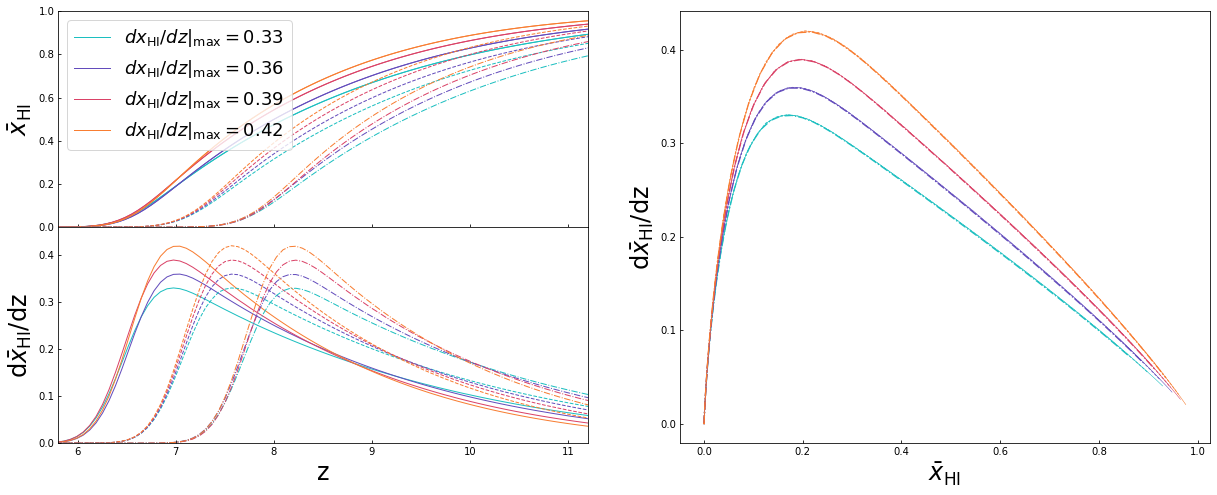

In [46]:
plt.figure(figsize=(16,6))
FONTSIZE = 24
ax1 = plt.subplot(221, position=[0,1,0.46,0.5])
max_dxHdz_array = [0.33, 0.36, 0.39, 0.42]
colorlist=['#1CBFC0', '#634CBC', '#DA4267', '#F87D31']; stylelist = ['-', '--', '-.']
ax1.tick_params(direction='in',length=3)
for i in range(len(zeta_array)):
    for j in range(len(zeta_array[i])):
        if (i == 0):
            ax1.plot(z_history_array[i][j], xH_history_array[i][j], linestyle = stylelist[i], color = colorlist[j], lw=1, label=r'$dx_\mathrm{HI}/dz |_\mathrm{max} = %5.5g$'%(max_dxHdz_array[j]))
        ax1.plot(z_history_array[i][j], xH_history_array[i][j], linestyle = stylelist[i], color = colorlist[j], lw=1)
ax1.legend(fontsize=18, loc = 2)
ax1.set_ylabel(r'$\bar{x}_{\mathrm{HI}}$',fontsize=FONTSIZE)
ax1.set_ylim(0,1)
ax1.set_xlim(5.8,11.2)
ax1.set_xticks([6,7,8,9,10,11])
ax1.set_xticklabels([])

ax2 = plt.subplot(223, position=[0,0.5,0.46,0.5])
for i in range(len(zeta_array)):
    for j in range(len(zeta_array[i])):
        ax2.plot(z_dxHdz_history[i][j], dxHdz_history[i][j], linestyle = stylelist[i], color = colorlist[j], lw=1, label=r'$\zeta=%3.3g, T_\mathrm{vir}=%5.5g$'%(zeta_array[i][j], T_vir_array[i][j]))
ax2.set_ylim(0.0,0.46); ax2.set_xlim(5.8,11.2)
ax2.set_ylabel(r'd$\bar{x}_{\mathrm{HI}}$/dz',fontsize=FONTSIZE)
ax2.set_xlabel('z',fontsize=FONTSIZE)
ax2.tick_params(direction='in',length=3)
ax2.set_xticks([6,7,8,9,10,11])
ax2.set_xticklabels(['6','7','8','9','10','11'])

ax3 = plt.subplot(122, position=[0.54,0.5,0.46,1])
lwlist = [0.3, 0.8, 1.3]
for i in range(len(zeta_array)):
    for j in range(len(zeta_array[i])):
        if (i == 0):
            ax3.plot(xH_history_array[i][j][:-1], dxHdz_history[i][j], linestyle = stylelist[i], color = colorlist[j], lw=lwlist[i], label=r'$dx_\mathrm{HI}/dz |_\mathrm{max} = %5.5g$'%(max_dxHdz_array[j]))
        ax3.plot(xH_history_array[i][j][:-1], dxHdz_history[i][j], linestyle = stylelist[i], color = colorlist[j], lw=lwlist[i])
#axs.set_ylim(0.0,0.46); axs.set_xlim(6,11)
ax3.set_ylabel(r'd$\bar{x}_{\mathrm{HI}}$/dz',fontsize=FONTSIZE)
ax3.set_xlabel(r'$\bar{x}_\mathrm{HI}$',fontsize=FONTSIZE)
ax3.tick_params(direction='in',length=3)
#ax3.legend(fontsize=19, loc = 1)
#ax1.set_title('1')

plt.savefig('../figures/history_groups.png', bbox_inches = 'tight', dpi=400)

In [122]:
#read in the Pk_A_HICO data
DIR_read = '/Users/liuzhaoning/Desktop/Today/antisym_observability/data/antisym_observability/Pk_A_group_class/'

kh_array = np.logspace(np.log10(0.1),np.log10(0.6), 16)
k_array = kh_array * antisym_func.hlittle
z_acc_array = []; z_dec_array = [] #[smoothing][z_turning][group][z]
dxHdz_acc_array = []; dxHdz_dec_array = [] #[smoothing][z_turning][group][dxHdz]
Pk_A_acc_map = []; Pk_A_dec_map = [] #[smoothing][z_turning][group][dxHdz/z][kh]

for smoothing_pk in SMOOTHING_Pk:
    z_acc_array.append([]); z_dec_array.append([])
    dxHdz_acc_array.append([]); dxHdz_dec_array.append([])
    Pk_A_acc_map.append([]); Pk_A_dec_map.append([])
    for i in range(len(zeta_array)):
        z_acc_array[-1].append([]); z_dec_array[-1].append([])
        dxHdz_acc_array[-1].append([]); dxHdz_dec_array[-1].append([])
        Pk_A_acc_map[-1].append([]); Pk_A_dec_map[-1].append([])
        for j in range(len(zeta_array[i])):
            zeta = zeta_array[i][j]; T_vir = T_vir_array[i][j]
            data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_acc_array.npz'%(zeta, T_vir, R_mfp, smoothing_pk))
            z_acc_array[-1][-1].append(list(data['z_xi_acc_smoothed_array'])); dxHdz_acc_array[-1][-1].append(list(data['dxHdz_xi_acc_smoothed_array']))
            Pk_A_acc_map[-1][-1].append(list(data['Pk_A_acc_map'])); 
            data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_dec_array.npz'%(zeta, T_vir, R_mfp, smoothing_pk))
            z_dec_array[-1][-1].append(list(data['z_xi_dec_smoothed_array'])); dxHdz_dec_array[-1][-1].append(list(data['dxHdz_xi_dec_smoothed_array'])) 
            Pk_A_dec_map[-1][-1].append(list(data['Pk_A_dec_map']))

#compute the average value of Pk_A_acc and the variance
Pk_A_acc_ave = [] #[smoothing][group][dxHdz/z][kh]
Pk_A_acc_sig = [] #[smoothing][group][dxHdz/z][kh]
for i in range(len(Pk_A_acc_map)):
    Pk_A_acc_ave.append([])
    Pk_A_acc_sig.append([])
    for j in range(len(Pk_A_acc_map[i][0])):
        Pk_A_acc_ave[-1].append([])
        Pk_A_acc_sig[-1].append([])
        for k in range(len(Pk_A_acc_map[i][0][j])):
            Pk_A_acc_ave[-1][-1].append([])
            Pk_A_acc_sig[-1][-1].append([])
            for m in range(len(Pk_A_acc_map[i][0][j][k])):
                ave = (Pk_A_acc_map[i][0][j][k][m] + Pk_A_acc_map[i][1][j][k][m] + Pk_A_acc_map[i][2][j][k][m]) / 3
                var = ((Pk_A_acc_map[i][0][j][k][m] - ave)**2 + (Pk_A_acc_map[i][1][j][k][m] - ave)**2 \
                         + (Pk_A_acc_map[i][2][j][k][m] - ave)**2) / 3
                sigma = var ** 0.5
                Pk_A_acc_ave[i][j][k].append(ave); Pk_A_acc_sig[i][j][k].append(sigma)
                

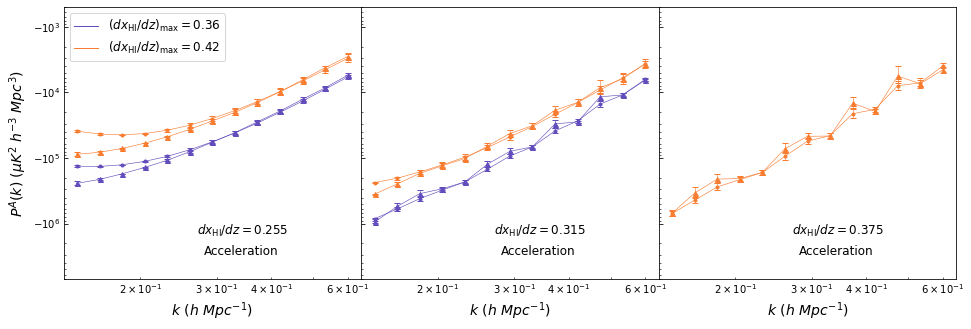

In [135]:
#plot the Pk_A_HICO comparison between different groups
COMPARISON_INDEX = [1, 3] # group number
FONTSIZE = 14

dxHdz_plot_list = [0.255, 0.315, 0.375]
fig, axs = plt.subplots(1, 3, sharey=True, sharex = True, figsize=(16, 5))
fig.subplots_adjust(wspace=0, hspace = 0)
for i in range(3):
    dxHdz_plot = dxHdz_plot_list[i]
    for k in range(len(T_vir_array[0])):
        if (k == COMPARISON_INDEX[0] or k == COMPARISON_INDEX[1]):
            for m in range(len(dxHdz_acc_array[0][0][k])):
                if (dxHdz_acc_array[0][0][k][m] == dxHdz_plot):
                    axs[i].errorbar(kh_array[3:], Pk_A_acc_ave[0][k][m][3:], yerr = Pk_A_acc_sig[0][k][m][3:], capsize = 3, linewidth = 0.6, markersize = 3, marker = 'o', color = colorlist[k],) #label=r'$model\ %d a,\ L_{box}=250 Mpc$'%(k+1), alpha = 1)
                    axs[i].errorbar([0], [0], linewidth = 1, color = colorlist[k], label=r'$(dx_\mathrm{HI}/dz)_\mathrm{max}=%3.3g$'%max_dxHdz[k])
            for m in range(len(dxHdz_acc_array[0][0][k])):
                if (dxHdz_acc_array[0][0][k][m] == dxHdz_plot):
                    axs[i].errorbar(kh_array[3:], Pk_A_acc_ave[1][k][m][3:], yerr = Pk_A_acc_sig[1][k][m][3:], capsize = 3, linewidth = 0.6, color = colorlist[k], ls = '-', marker = '^', markersize = 5,) #label=r'$model\ %d a,\ L_{box}=384 Mpc$'%(k+1), alpha = 1)
    axs[i].text(0.27, 1.5e6, '$dx_\mathrm{HI} / dz = %3.3g$'%dxHdz_plot, fontsize = FONTSIZE - 2)
    axs[i].text(0.28, 3e6, 'Acceleration', fontsize= FONTSIZE - 2)
    axs[i].set_xlabel(r'$k\ (h\ Mpc^{-1})$',fontsize = FONTSIZE)
    axs[i].set_xticks([0.14,0.2,0.3,0.4,0.5,0.6])
    axs[i].set_xticklabels(['0.14','0.2','0.3','0.4','0.5','0.6'])
    #axs[i].loglog(np.linspace(0.1, 0.6, 100), PkA_simu_fit_plot, '-', color = 'black', linewidth = 1, label = '21cmFAST')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = FONTSIZE)
axs[0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = FONTSIZE)
axs[0].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7])
axs[0].set_yticklabels(['$-10^{3}$','$-10^{4}$','$-10^{5}$','$-10^{6}$','$-10^{7}$'])
axs[0].set_ylim(5e2, 7e6)
axs[0].legend(loc=2, fontsize=FONTSIZE-2)

axs[0].invert_yaxis()
fig.savefig('../figures/Pk_A_HICO_SmoothingScale_compare%d%d_LEN%dLEN%d.png'%(COMPARISON_INDEX[0], COMPARISON_INDEX[1], SMOOTHING_Pk[0], SMOOTHING_Pk[1]), bbox_inches='tight', dpi=200)

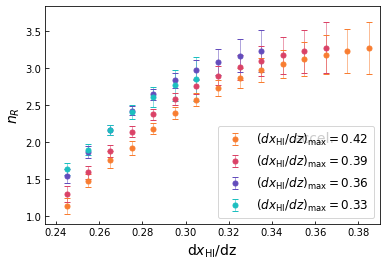

In [34]:
#plot the nR - dxH/dz relation with smoothing scale 384 Mpc
#set the parameters
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
R_mfp = 50 #Mpc
M_max = antisym_func.RtoM(R_mfp)
mu = 0.6 #since all of T_vir > 1e4
SMOOTHING_Pk = 384
SMOOTHING_SCALE = 384

zeta_array = []; T_vir_array = [];#[z_turning][maximum_speed]
zeta_array.append([17.15, 22.3, 28.4, 37.3]); T_vir_array.append([2.71e4, 4.3e4, 6.6e4, 9.5e4])
zeta_array.append([20.3, 26.4, 34.6, 45.7]); T_vir_array.append([2.28e4, 3.66e4, 5.6e4, 8.2e4])
zeta_array.append([24, 31.6, 42.5, 56.5]); T_vir_array.append([1.9e4, 3.08e4, 4.7e4, 6.9e4])
max_dxHdz = [0.33, 0.36, 0.39, 0.42]

#read in the history of our groups
DIR_read = '/Users/liuzhaoning/Desktop/Today/antisym_observability/data/antisym_observability/xi_A_HICO/'

z_history_array = []; xH_history_array = []#[z_turning][maximum_speed]
z_dxHdz_history = []; dxHdz_history = []
for i in range(len(zeta_array)):
    z_history_array.append([]); xH_history_array.append([])
    z_dxHdz_history.append([]); dxHdz_history.append([])
    for j in range(len(zeta_array[i])):
        zeta = zeta_array[i][j]; T_vir = T_vir_array[i][j]
        data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/history.npz'%(zeta, T_vir, R_mfp, SMOOTHING_SCALE))
        z_history_array[-1].append(list(data['z_array_history'])); xH_history_array[-1].append(list(data['HI_history']))
        z_dxHdz_history[-1].append(list(data['z_dxHdz_history'])); dxHdz_history[-1].append(list(data['dxHdz_history']))

#read in the Pk_A_HICO data
DIR_read = '/Users/liuzhaoning/Desktop/Today/antisym_observability/data/antisym_observability/Pk_A_group_class/'

kh_array = np.logspace(np.log10(0.1),np.log10(0.6), 16)
k_array = kh_array * antisym_func.hlittle
z_acc_array = []; z_dec_array = [] #[z_turning][group][z]
dxHdz_acc_array = []; dxHdz_dec_array = [] #[z_turning][group][dxHdz]
Pk_A_acc_map = []; Pk_A_dec_map = [] #[z_turning][group][dxHdz/z][kh]
for i in range(len(zeta_array)):
    z_acc_array.append([]); z_dec_array.append([])
    dxHdz_acc_array.append([]); dxHdz_dec_array.append([])
    Pk_A_acc_map.append([]); Pk_A_dec_map.append([])
    for j in range(len(zeta_array[i])):
        zeta = zeta_array[i][j]; T_vir = T_vir_array[i][j]
        data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_acc_array.npz'%(zeta, T_vir, R_mfp, SMOOTHING_Pk))
        z_acc_array[-1].append(list(data['z_xi_acc_smoothed_array'])); dxHdz_acc_array[-1].append(list(data['dxHdz_xi_acc_smoothed_array']))
        Pk_A_acc_map[-1].append(list(data['Pk_A_acc_map'])); 
        data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_dec_array.npz'%(zeta, T_vir, R_mfp, SMOOTHING_Pk))
        z_dec_array[-1].append(list(data['z_xi_dec_smoothed_array'])); dxHdz_dec_array[-1].append(list(data['dxHdz_xi_dec_smoothed_array'])) 
        Pk_A_dec_map[-1].append(list(data['Pk_A_dec_map']))
        
COMPARISON_INDEX = [0, 3]

#calculate the powerlaw index n_R
kh_floor = 3; kh_ceil = 9 #in the range of (0.14, 0.27)
A_R_acc = []; n_R_acc = []; A_R_error_acc = []; n_R_error_acc = [] #[model][dxHdz]
for i in range(len(T_vir_array)):
    A_R_acc.append([]); n_R_acc.append([]); A_R_error_acc.append([]); n_R_error_acc.append([])
    for j in range(len(T_vir_array[i])):
        A_R_acc[-1].append([]); n_R_acc[-1].append([]); A_R_error_acc[-1].append([]); n_R_error_acc[-1].append([])
        for k in range(len(dxHdz_acc_array[i][j])):
            A_R_acc[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_acc_map[i][j][k][kh_floor:kh_ceil], 2)[0])
            n_R_acc[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_acc_map[i][j][k][kh_floor:kh_ceil], 2)[1])
            A_R_error_acc[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_acc_map[i][j][k][kh_floor:kh_ceil], 2)[2])
            n_R_error_acc[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_acc_map[i][j][k][kh_floor:kh_ceil], 2)[3])

A_R_dec = []; n_R_dec = []; A_R_error_dec = []; n_R_error_dec = [] #[model][dxHdz]
for i in range(len(T_vir_array)):
    A_R_dec.append([]); n_R_dec.append([]); A_R_error_dec.append([]); n_R_error_dec.append([])
    for j in range(len(T_vir_array[i])):
        A_R_dec[-1].append([]); n_R_dec[-1].append([]); A_R_error_dec[-1].append([]); n_R_error_dec[-1].append([])
        for k in range(len(dxHdz_dec_array[i][j])):
            A_R_dec[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_dec_map[i][j][k][kh_floor:kh_ceil], 2)[0])
            n_R_dec[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_dec_map[i][j][k][kh_floor:kh_ceil], 2)[1])
            A_R_error_dec[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_dec_map[i][j][k][kh_floor:kh_ceil], 2)[2])
            n_R_error_dec[-1][-1].append(antisym_func.fit_nR(kh_array[kh_floor:kh_ceil], Pk_A_dec_map[i][j][k][kh_floor:kh_ceil], 2)[3])

#mix the points in different arrays into one
def mix(kh_array, Pk_A_array):
    kh_array_total = []; Pk_A_array_total = []
    for i in range(len(Pk_A_array)):
        for kh in kh_array:
            kh_array_total.append(kh)
    for i in range(len(Pk_A_array)):
        for Pk_A in Pk_A_array[i]:
            Pk_A_array_total.append(Pk_A)
    return [kh_array_total, Pk_A_array_total]

#fit the slope with all three conditions of similar histories
kh_floor = 3; kh_ceil = 9 #in the range of (0.14, 0.27)
A_R_acc_total = []; n_R_acc_total = []; A_R_error_acc_total = []; n_R_error_acc_total = [] #[model][dxHdz]
for i in range(4):
    A_R_acc_total.append([]); n_R_acc_total.append([]); A_R_error_acc_total.append([]); n_R_error_acc_total.append([])
    for j in range(len(dxHdz_acc_array[0][i])):
        [kh_array_total, Pk_A_array_total] = mix(kh_array[kh_floor:kh_ceil], [Pk_A_acc_map[0][i][j][kh_floor:kh_ceil], Pk_A_acc_map[1][i][j][kh_floor:kh_ceil], Pk_A_acc_map[2][i][j][kh_floor:kh_ceil]])
        A_R_acc_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[0])
        n_R_acc_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[1])
        A_R_error_acc_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[2])
        n_R_error_acc_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[3])
A_R_dec_total = []; n_R_dec_total = []; A_R_error_dec_total = []; n_R_error_dec_total = [] #[model][dxHdz]
for i in range(4):
    A_R_dec_total.append([]); n_R_dec_total.append([]); A_R_error_dec_total.append([]); n_R_error_dec_total.append([])
    for j in range(len(dxHdz_dec_array[0][i])):
        [kh_array_total, Pk_A_array_total] = mix(kh_array[kh_floor:kh_ceil], [Pk_A_dec_map[0][i][j][kh_floor:kh_ceil], Pk_A_dec_map[1][i][j][kh_floor:kh_ceil], Pk_A_dec_map[2][i][j][kh_floor:kh_ceil]])
        A_R_dec_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[0])
        n_R_dec_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[1])
        A_R_error_dec_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[2])
        n_R_error_dec_total[-1].append(antisym_func.fit_nR(kh_array_total, Pk_A_array_total, 2)[3])
        
#fit the nR-dxHdz relation
def fit_nR_dxHdz(dxHdz_array, nR_array):
    def quadratic_func(dxHdz, a, b):
        return a * dxHdz + b
    popt, pocv = curve_fit(quadratic_func, dxHdz_array, nR_array)
    SS_res = 0; SS_tot = 0
    y_bar = sum(nR_array) / len(nR_array)
    for i in range(len(dxHdz_array)):
        SS_res += ((popt[0] * dxHdz_array[i] + popt[1]) - nR_array[i]) ** 2
        SS_tot += (y_bar - nR_array[i]) ** 2
    R2 = 1 - SS_res / SS_tot 
    return [popt[0], popt[1], pocv[0,0] ** 0.5, pocv[1,1] ** 0.5, R2]

#calculate the parameters
a_array = []; b_array = []; 
for i in range(4):
    a_array.append(fit_nR_dxHdz(dxHdz_acc_array[0][i][2:-2], n_R_acc_total[i][2:-2])[0])
    b_array.append(fit_nR_dxHdz(dxHdz_acc_array[0][i][2:-2], n_R_acc_total[i][2:-2])[1])


#plot the n_R comparison
FONTSIZE = 14
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
fig.subplots_adjust(wspace=0)

for i in [0,1,2,3]:
    i = 3-i
    n_R_acc_fit = []
    #if (i == COMPARISON_INDEX[0] or i == COMPARISON_INDEX[1]):
    for dxHdz in dxHdz_acc_array[0][i][2:-2]:
        n_R_acc_fit.append(a_array[i] * dxHdz + b_array[i] )
    #axs.errorbar(dxHdz_acc_array[0][i][2:-2], n_R_acc_fit, fmt='--^', markersize = 0, capsize = 3, color = colorlist[i])
    axs.errorbar(dxHdz_acc_array[0][i][2:-2], n_R_acc_total[i][2:-2], lw = 0.5, yerr = n_R_error_acc_total[i][2:-2], fmt='o', markersize = 5, capsize = 3, color = colorlist[i], label=r'$(dx_\mathrm{HI}/dz)_\mathrm{max}=%3.3g$'%max_dxHdz[i])
    #axs[1].errorbar(dxHdz_dec_array[0][i], n_R_dec_total[i], lw = 0.5, yerr = n_R_error_dec_total[i], fmt='o', markersize = 5, capsize = 3, color = colorlist[i], label=r'$(dx_\mathrm{HI}/dz)_\mathrm{max}=%3.3g$'%max_dxHdz[i])
axs.legend(fontsize=FONTSIZE-2, loc=4)
#axs[1].set_xlim(0.245,0.42)
#axs[1].invert_xaxis()
axs.set_xlabel(r'd$x_\mathrm{HI}$/dz',fontsize = FONTSIZE)
#axs[1].set_xlabel(r'd$x_\mathrm{HI}$/dz',fontsize=14)
#axs[1].text(0.405, 1, 'The smoothing scale: 300 Mpc',fontsize = 14)
axs.text(0.35, 2, 'accel.',fontsize = FONTSIZE)
#axs[1].text(0.378, 2, 'decel.',fontsize = 14)
axs.set_ylabel(r'$n_R$',fontsize=FONTSIZE)
axs.set_xlim(0.235,0.39)
#axs.set_ylim(0,3.6)
fig.savefig('../figures/nR_parameters_classify_LEN%3.3g_fit.png'%SMOOTHING_Pk, bbox_inches='tight', dpi=200)